In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

In [2]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [3]:
dfp = pd.read_csv(r'\Paper.csv.zip')

In [4]:
dfp.columns = ['PaperID', 'Year', 'C5', 'Citation_Count', 'hit', 'Reference_Count',
       'Team_Size', 'Institution_Count', 'Country_Count', 'Title_Length',
       'Atyp_10pct_Z', 'Novelty_percentile', 'Disruption',
       'Disruption_percentile', 'RaoStirling', 'NIH_Count', 'NSF_Count',
       'Patent_Count', 'Newsfeed_Count', 'Tweet_Count', 'NCT_Count',
       'TeamAgeDiversity', 'Team_Diversity_Gini', 'TeamAgeMean', 'TeamAgeMax',
       'TeamAgeMin', 'Reference_Age_Mean', 'Reference_Age_Std', 'FieldID',
       'FieldName', 'FieldID2', 'FieldName2', 'JournalID']

In [5]:
dffield = pd.read_csv(r'E:\netData\SciSciNet\data\SciSciNet_Fields.tsv',sep='\t')
dfp['FieldName']=dfp['FieldID'].map(dffield.set_index('FieldID')['Field_Name'])

Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
dfp = dfp[dfp['FieldName'].isin(Flst)]

In [6]:
dfp['Team_Age'] = dfp['TeamAgeMean'].apply(np.ceil)

# Draw Fig. 2 team age and impact/novelty/raostiring

In [7]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
colors = sns.color_palette("mako", 16)
x = range(1 , 61)
c = 'Disruption_percentile'

In [8]:
y = dfp.groupby('Team_Age')[c].mean().reset_index()
ylst = [dfp[dfp['FieldName']==F].groupby('Team_Age')[c].mean().reset_index() for F in Flst]

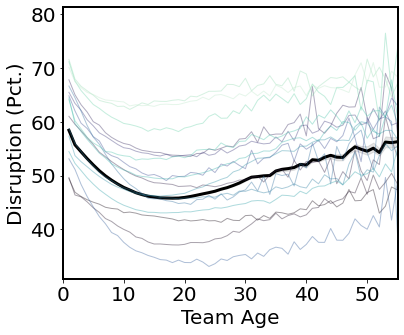

In [18]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c,color='grey',n_boot=30)
plt.plot(y['Team_Age'].values, y[c].values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst)):
    plt.plot(ylst[i]['Team_Age'].values, ylst[i][c].values,linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Disruption (Pct.)',fontsize = 20)
plt.xlim(0,55)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\fig 3\1a.svg",bbox_inches = 'tight')

# based on team size

In [11]:
def resetTeam(x):
    if x<9:
        return x
    else:
        return 9
dfp['TeamSizeG'] = dfp['Team_Size'].apply(resetTeam)

In [12]:
colors2 = sns.color_palette("rocket", 9)

In [14]:
y_ = dfp.groupby('Team_Age')[c].mean()
ylst_ = [dfp[dfp['TeamSizeG']==G].groupby('Team_Age')[c].mean() for G in range(1,10)]

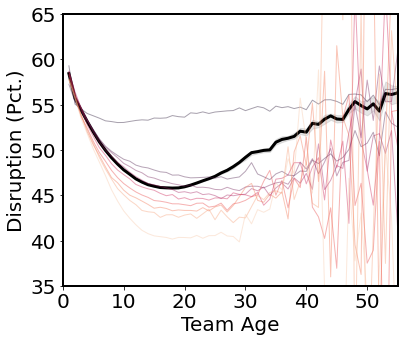

In [20]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_Age',y=c,color='grey',n_boot=30)
plt.plot(y_.index, y_.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst_)):
    plt.plot(ylst_[i].index, ylst_[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age',fontsize = 20)
plt.ylabel('Disruption (Pct.)',fontsize = 20)
plt.xlim(0,55)
plt.ylim(35,65)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\fig 3\1b.svg",bbox_inches = 'tight')

# Distribution

C:\Users\nd\AppData\Local\Temp\ipykernel_14116\3348977981.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,2, 1)


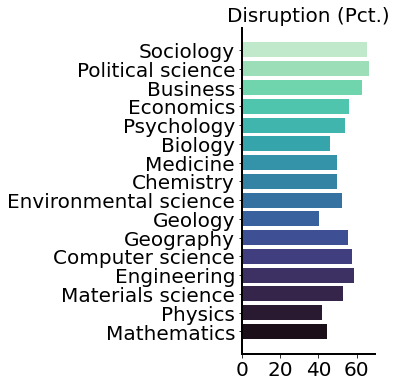

In [24]:
d1 = pd.DataFrame(dfp.groupby(dfp['FieldName'])[c].mean())  
d1 = d1.loc[Flst,:]

plt.subplots(1,1,figsize=(5,6))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.1,hspace=0.3)
ax = plt.subplot(1,2, 1)
plt.barh( d1.index ,  d1.values.flatten(), capsize = 3, color = colors)
# plt.ylim(-.7,15.7)
# plt.xlim(0,20)
plt.xticks(fontsize=20,)
plt.yticks(fontsize=20,)
plt.title('Disruption (Pct.)',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.savefig(r"savepath\fig 3\m1.svg",bbox_inches = 'tight')

In [26]:
d11 = pd.DataFrame(dfp.groupby(dfp['TeamSizeG'])[c].mean())  

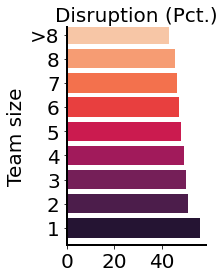

In [34]:
plt.subplots(1,1,figsize=(2.5,4))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.3)
ax = plt.subplot(1,1, 1)
plt.barh( d11.index , d11.values.flatten(), capsize = 3, color = colors2)
plt.ylim(.3,9.3)
plt.xticks(fontsize=20,)
plt.yticks([1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,'>8'],fontsize=20,)
plt.ylabel('Team size',fontsize=20,)
plt.title('Disruption (Pct.)',fontsize = 20, horizontalalignment='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.savefig(r"savepath\fig 3\n.svg",bbox_inches = 'tight')

In [35]:
dfp['Team_D'] = dfp['TeamAgeDiversity'].apply(lambda x:np.round(x,2)*100//4*0.04)

# Draw Fig. 2 team age and impact/novelty/raostiring

In [36]:
Flst = ['Mathematics', 'Physics','Materials science', 'Engineering', 'Computer science',
       'Geography', 'Geology', 'Environmental science', 'Chemistry',
        'Medicine', 'Biology','Psychology', 'Economics', 'Business', 'Political science','Sociology']
colors = sns.color_palette("mako", 16)
x = range(1 , 61)
c = 'Disruption_percentile'

In [37]:
y = dfp.groupby('Team_D')[c].mean().reset_index()
ylst = [dfp[dfp['FieldName']==F].groupby('Team_D')[c].mean().reset_index() for F in Flst]

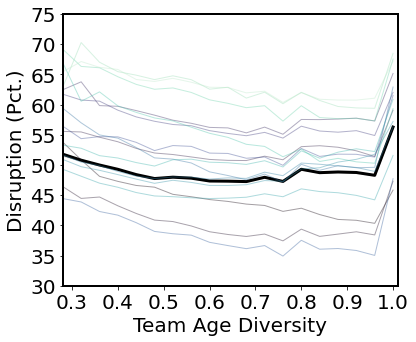

In [43]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c,color='grey',n_boot=30)
plt.plot(y['Team_D'].values, y[c].values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst)):
    plt.plot(ylst[i]['Team_D'].values, ylst[i][c].values,linewidth=1,alpha = .4,c=colors[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('Disruption (Pct.)',fontsize = 20)
plt.xlim(0.28,1.01)
plt.ylim(30,75)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\fig 3\2a.svg",bbox_inches = 'tight')

# based on team size

In [39]:
def resetTeam(x):
    if x<9:
        return x
    else:
        return 9
dfp['TeamSizeG'] = dfp['Team_Size'].apply(resetTeam)

In [40]:
colors2 = sns.color_palette("rocket", 9)

In [41]:
y_ = dfp.groupby('Team_D')[c].mean()
ylst_ = [dfp[dfp['TeamSizeG']==G].groupby('Team_D')[c].mean() for G in range(1,10)]

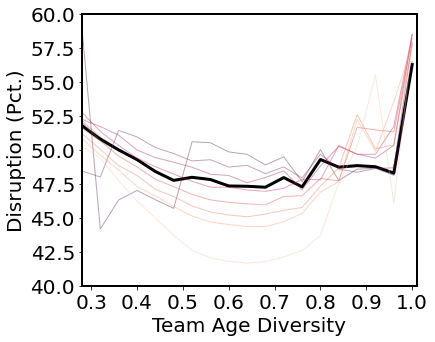

In [44]:
f, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(dfp,x='Team_D',y=c,color='grey',n_boot=30)
plt.plot(y_.index, y_.values,linewidth=3,alpha = 1,c='black')
for i in range(len(ylst_)):
    plt.plot(ylst_[i].index, ylst_[i].values,linewidth=1,alpha = .4,c=colors2[i])
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Team Age Diversity',fontsize = 20)
plt.ylabel('Disruption (Pct.)',fontsize = 20)
plt.xlim(0.28,1.01)
plt.ylim(40,60)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.savefig(r"savepath\fig 3\2b.svg",bbox_inches = 'tight')